### FFT with rotating plate

The setup was conducted as follows:


1.The laser with wavelength $\lambda$

= 660 nm was calibrated to hit the polarimeter at the end of the setup centrally.


2.A train consisting of linear polarizer LP2 (Pol.), $\frac{\lambda}{2}$
-WP 600 - 2700 nm and $\frac{\lambda}{4}$

-WP 690 - 1200 nm was assembled and placed into the laser beam.


3.By rotating the WPs of the train horizontally polarized light was set.

The angles of the optical elements in the train in the order set were $\Theta_{1}=49^{\circ}$
, $\Theta_{2}=227^{\circ}$ and $\Theta_{3}=???^{\circ}$

, because the last plate holder had no markings.

The parameters of the horizontally polarized light were: S1=1.000 ; S2=-0.002 ; S3=-0.004 ; DOP=103.9 % and power=-19.61 dBm

Annotation: The angle of LP2 (Pol.) in the train could have been set that maximum intensity is transmitted, but wasn't.


4.In order to find the angle $\alpha$
of the x-axis following procedure was used. Another linear polarizer LP3, which is here also referred to as P1, was inserted after the train and rotated until maximum intensity was measured by the polarimeter.This was the case for $\alpha_{1}=131^{\circ}$

The measured parameters were:

S1=0.999 ; S2=0.001 ; S3=0.041 ; DOP=103.7 % and power=-21.3 dBm


5.Another linear polarizer LP1, which is here also referred as P2, was inserted behind P1 just in front of the polarimeter and rotated until maximum intensity was measured by the polarimeter.This was the case for $\alpha_{2}=336^{\circ}$

The measured parameters were:

S1=1.000 ; S2=0.002 ; S3=0.002 ; DOP=103.7 % and power=-21.95 dBm

Now the angle of P2 is set to transmit horizontally polarized light most effectively and therefore this angle is assigned to the x-axis. Accordingly, in relation to the x-axis P2 is now set at $\alpha$=0.
This position is not changed during the measurement


6.All components are removed, except the train, and left-circularly polarized light intended for measurement is set.

S1=-0.003 ; S2=-0.067 ; S3=-0.997 ; DOP=98.3 % and power=-19.87 dBm


7.Behind the train we insert the $\frac{\lambda}{4}$
-WP 600 - 2700 nm in the rotating wheel and behind the wheel we insert LP1 as P2 at angle $\alpha$=0


8.The wheel is rotated from 0 to 2 𝜋
and 361 equally distanced data points are recorded

### Read in data for setup like in paper
Do experiment for left-handed polarized light

In [184]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import Symbol, cos, sin, pi, sqrt, symbols
from sympy.matrices import *
from sympy.utilities.lambdify import lambdify
from sympy.interactive.printing import init_printing
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from scipy.optimize import curve_fit, minimize
from scipy import fftpack
import os
from os.path import join, getsize

import matplotlib as mpl
mpl.use('pdf')

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 8,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8.7)
plt.rc('ytick', labelsize=8.7)
plt.rc('axes', labelsize=8.7)

# width as measured in inkscape
width = 2.809
height = width / 1.618

directories=[]


for root, dirs, files in os.walk('20190522/'):
    if files != []:
        a=str(root)+str('/')+str(files[0])
        directories.append(a)

# Only circular polarization
# Right circular regular[1] 360
# RL[2] 180
# RL[3] 90
# RL[4] 45
# RL[5] 25
# RL[6] 12
# RL[7] 6

directories=directories[7:8]
print(directories)
data=[]
measurement_point_all=[]
angle_all=[]
s1_all=[]
s2_all=[]
s3_all=[]
dop_all=[]
power_all=[]

for i in directories:
    f=open(i)
    lines=f.readlines()
    for i in range(26):
        lines.pop(0)
    measurement_point=[]
    angle=[]
    s1=[]
    s2=[]
    s3=[]
    dop=[]
    power=[]
    for line in lines:
        measurement_point.append( line.strip().split('\t')[0] )
        angle.append( line.strip().split('\t')[1] )
        s1.append( line.strip().split('\t')[2] )
        s2.append( line.strip().split('\t')[3] )
        s3.append( line.strip().split('\t')[4] )
        dop.append( line.strip().split('\t')[5] )
        power.append( line.strip().split('\t')[6] )
    measurement_point_all.append(measurement_point)
    angle_all.append(angle)
    s1_all.append(s1)
    s2_all.append(s2)
    s3_all.append(s3)
    dop_all.append(dop)
    power_all.append(power)
measurement_point=np.array(measurement_point_all).astype(np.float) 
angle=np.array(angle_all).astype(np.float)
s1=np.array(s1_all).astype(np.float) 
s2=np.array(s2_all).astype(np.float)
s3=np.array(s3_all).astype(np.float) 
dop=np.array(dop_all).astype(np.float)
power=np.array(power_all).astype(np.float)

['20190522/171029_polarimeter_vs_wheel/171029_polarimeter_vs_wheel.dat']


In [185]:

#fig, ax=plt.subplots()
#plt.plot(angle[0], power[0]*10**(6), label="Measurement")
#ax.set_xlabel(r'$\Theta$ (deg)')
#ax.set_ylabel(r'Intensity ($\mu W$)')
#ax.legend(loc='lower left')
#fig.subplots_adjust(left=.19, bottom=.22, right=.99, top=.97)

#fig.set_size_inches(width, height)
#plt.show()
#plt.savefig('datapoints_6.pdf', fmt='pdf')'

### Calculate discrete Fourier series coefficients like in paper
For an uneven number of data points like in our case with N = 2L = 361 we can calculate the discrete Fourier series coefficients according to
$$C_{\omega, k}=\frac{2}{N} \frac{1}{1+\delta_{k0}} \sum_{i=1}^N I_{T_{i}} cos \omega_{k} \beta_{i}$$
$$S_{\omega, k}=\frac{2}{N} \frac{1}{1+\delta_{k0}} \sum_{i=1}^N I_{T_{i}} sin \omega_{k} \beta_{i}$$
with the discrete angular velocities
$$\omega_{k} = \frac{2\pi}{N} \frac{k}{\Delta \beta}$$ the angular positions $$\beta_{i}=(i-1)\Delta \beta$$ and $\Delta \beta$ being the difference in the angle for two neighboring data points.

We need to consider that due to the dependance of the discrete angular velocities on the step size, it can happen that the 2 $\omega$ and 4$\omega$ signals, which correspond to circular and linear polarizations, are not exactly included in our calculations. Therefore, we look for the discrete angular frequencies, which are closest to the requirements.

### Starting Parameters
For circular polarized light
S1=-0.003
S2=-0.067
S3=-0.997
DOP: 98.3 %
Power: -19.87 dBm

In [186]:
# Calculate discrete Fourier coefficients for an uneven number of data points N=2L+1

intensity=power[0]

L=len(intensity)/2
N=2*L+1
index=np.linspace(0,2,len(intensity))

print(index)
omega_k=[]
# Define step size
delta_beta=(index[1]-index[0])*2*np.pi
# Calculate all omega_k up to k=180, more than that is not required anyways
for i in np.arange(N):
    omega_k.append(2*np.pi*i/(N*delta_beta))
omega_k=np.array(omega_k)
# Calculate Fourier series coefficients
C_omega_k=[]
S_omega_k=[]

# Sum in definition of C_omega_k with cos terms

def sum_cos(x):
    ''' Calculate formula from above with variable x=omega_{k}'''
    sum_cos=0
    j=0
    for i in index:
        sum_cos=sum_cos+ intensity[j]*np.cos(x*i*np.pi)
        j+=1
    return sum_cos
a=sum_cos(omega_k)

# Sum in definition of S_omega_k with sin terms
def sum_sin(x):
    '''Same with sin'''
    sum_sin=0
    j=0
    for i in index:
        sum_sin+= intensity[j]*np.sin(x*i*np.pi)
        j+=1
    return sum_sin

#print(sum_sin(omega_k))
def fourier_coefficients(x):
    '''Calculate complete Fourier coefficients'''
    C_omega_k=(2/N)* sum_cos(x)
    S_omega_k=(2/N)* sum_sin(x)
    return C_omega_k, S_omega_k


# Loop to get all Fourier coefficients
Cs=[]
indices=[]
Ss=[]
# Calculate only first 11 Fourier coefficients

# Find indices, where omega_k is closest to desired integer values

for i in np.arange(11):
    indices.append(np.where(  np.absolute(omega_k-i)==np.amin(np.absolute(omega_k-i)) )[0][0] )

for i in np.arange(11):
    Cs.append(fourier_coefficients(omega_k)[0][indices[i]])
    Ss.append(fourier_coefficients(omega_k)[1][indices[i]])
Cs[0]=Cs[0]*0.5
#Calculating Fourier coefficients, which correspond to omega_k=2, 4
# Same method as above, did it just to check if the method is right
# Find index of entry of omega_k, which is closest to omega_k = 0,2 or 4
index_0,=np.where( omega_k==np.amin(omega_k) )
index_2,=np.where(  np.absolute(omega_k-2)==np.amin(np.absolute(omega_k-2)) )
index_4,=np.where(  np.absolute(omega_k-4)==np.amin(np.absolute(omega_k-4)) )


print('omega_k=', omega_k)
# Calculate Fourier coefficients for omega_k = 2,4
# Factor 0.5 for omega_k=0 to account for special case of fourier series coefficient formula
C0=fourier_coefficients(omega_k)[0][index_0[0]]*0.5
C2=fourier_coefficients(omega_k)[0][index_2[0]]
C4=fourier_coefficients(omega_k)[0][index_4[0]]
S2=fourier_coefficients(omega_k)[1][index_2[0]]
S4=fourier_coefficients(omega_k)[1][index_4[0]]


[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ]
omega_k= [0.    0.375 0.75  1.125 1.5   1.875 2.25  2.625]


We need to regard only the 0 $\omega$, 2$\omega$ and 4$\omega$ signals, as these are the only ones contributing to the resulting intensity. As expected for horizontally polarized light the coefficients C2 and S2, which correspond to circular polarized light, are suppressed

In [187]:
print("C0=", Cs[0])
print("C2=", Cs[2]) 
print("C4=", Cs[4])
print("S2=", Ss[2])
print("S4=", Ss[4])

C0= 5.14954932384625e-06
C2= 3.846741518093652e-06
C4= 9.620019120666585e-07
S2= -3.0663347271002506e-06
S4= 9.816696633351132e-07


### Calculate the other Stokes parameters
\begin{align}
M=\frac{2}{1-cos\delta}\left[C_{4}cos(2\alpha + 4\beta_{0}) + S_{4}sin(2\alpha + 4\beta_{0})\right]\\
|M|=\frac{2}{1-cos\delta} \left( C_{4}^2 + S_{4}^2  \right)^{\frac{1}{2}}\\
C=\frac{2}{1-cos\delta}\left[S_{4}cos(2\alpha + 4\beta_{0}) - C_{4}sin(2\alpha + 4\beta_{0})\right]\\
S=\frac{C_{2}}{sin\delta sin(2\alpha + 4\beta_{0})}=\frac{-S_{2}}{sin \delta cos(2\alpha + 4\beta_{0})}\\
|S|= \frac{  \left( C_{2}^2 + S_{2}^2\right)^{\frac{1}{2}}}{  sin^2 \delta}\\
I=C_{0} - \frac{1+cos \delta}{1-cos \delta} \left[  C_{4} cos(4 \alpha+ 4\beta_{0}) + S_{4} sin(4\alpha +4\beta_{0})     \right]
\end{align} 
In order to obtain the values of the parameters we need to measure the angles $\alpha$ and $\beta_{0}$, where $\alpha$ can be obtained while setting the system up and $\beta_{0}$ can be obtained by measuring either strongly circularly polarized light or strongly linearly polarized light and using the relations above.

For strongly circularly polarized light we get
\begin{align}
tan(4\beta_{0} + 2\alpha)=\frac{-C_{2}}{S_{2}}
\end{align}



We also need the retardance of the half-wave-plate. Here the theoretical retardance was used. There is also an estimate of the true retardance from another measurement, which is around $\delta$=$86-88^\circ$, but the error on that is yet unknown, so it is not used for now.

In [188]:

modulus_S=sqrt( Cs[2]**2 + Ss[2]**2  )/(np.sin(np.pi/2)**2)
modulus_M=sqrt( Cs[4]**2 + Ss[4]**2  )*4/(1-cos(np.pi/2))



# Calculate Stokes parameters from angles

# Define retardance and angles
delta=np.pi/2
alpha=0
# Formula for circularly polarized light
if -Cs[2]>0:
    print('AAa')
    beta_0=(np.arctan2(-Cs[2],Ss[2])-2*alpha)/4
else:
    print('bbb')
    beta_0=(np.arctan2(-Cs[2],Ss[2])+2*np.pi-2*alpha)/4

# Calculate Stokes parameters from angles and Fourier coefficients
M=(2/(1-np.cos(delta)))*( Cs[4]*np.cos(2*alpha+4*beta_0) + Ss[4]*np.sin(2*alpha+4*beta_0)  )
C=(2/(1-np.cos(delta)))*( Ss[4]*np.cos(2*alpha+4*beta_0) - Cs[4]*np.sin(2*alpha+4*beta_0)  )
# Calculate S from Cs[2] and Ss[2] each to check on plausibility (see Formula)
S_first=Cs[2]/(np.sin(delta)*np.sin(2*alpha+4*beta_0))
S_second=-Ss[2]/(np.sin(delta)*np.cos(2*alpha+4*beta_0))
I=Cs[0]-((1+np.cos(delta))/(1-np.cos(delta)))*(Cs[4]*np.cos(4*alpha + 4*beta_0)+Ss[4]*np.sin(4*alpha + 4*beta_0))




# Modulation ratio
# This formula only applicable to horizontal polarization
eta=M*(1-np.cos(delta))/(2*I + M*np.cos(2*alpha*(1+np.cos(delta))))

bbb


For $\beta_{0}$ from the formula for circular polarized light we get

In [189]:
display('beta_{0}', beta_0)
print(beta_0*180/np.pi)
print('-Cs2/Ss2',-Cs[2]/Ss[2])
#print((np.arctan2(-1,1)*180/np.pi) +2*180)

'beta_{0}'

57.86019171359196
-Cs2/Ss2 1.2545080235683894


### Comparison computed Stokes parameters and measured Stokes parameters

$$\vec{S}_{Meas.}=\left(\begin{array}{c} 1 \\ -0.003 \\ -0.067 \\ -0.997 \end{array}\right)$$

In [190]:
print('I=', I)
print('M/I=', (M/I) )
print('C/I=', (C/I)   )
print('S from C_{2}/I=', S_first/I)
print('S from -S_{2}/I=', S_second/I)

I= 6.51681811027543e-06
M/I= -0.41961238239051996
C/I= 0.04307420633333793
S from C_{2}/I= -0.7548671887702385
S from -S_{2}/I= -0.754867188770238


We see that the relative Stokes parameters correspond to the expectations. The sign of M is wrong, but due to the small value it could be just a fluctuation around zero.

The magnitude of S can always be computed without knowing the angles $\alpha$ and $\beta_{0}$

In [191]:
print('|S|=', modulus_S)
print('Normalized |S| with sign from S_{2}=', (modulus_S/I)*np.sign(S_second) )
print('Normalized |S| with sign from C_{2}=', (modulus_S/I)*np.sign(S_first) )

|S|= 4.91933216663059e-6
Normalized |S| with sign from S_{2}= -0.754867188770238
Normalized |S| with sign from C_{2}= -0.754867188770238


From that we have also a good correspondence.

Absolute values for completeness.

In [192]:
print('M=', M)
print('C=', C)
print('S_first=', S_first)
print('S_second=', S_second)
print('I=', I)

M= -2.7345375728583596e-06
C= 2.8070676791883726e-07
S_first= -4.919332166630592e-06
S_second= -4.9193321666305886e-06
I= 6.51681811027543e-06


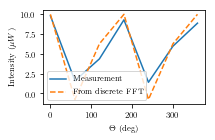

In [193]:
### Compare plots

#plt.figure()
#plt.plot(angle[0], power[0])
#plt.ylabel('Intensity')
#plt.xlabel('Degree °')
#plt.title(r'Measurement for $\frac{1}{4}$ WP 600-2700 nm')

#I_T=np.array([Cs[0]+Cs[2]*cos(2*i) + Cs[4]*cos(4*i)
#         + Ss[2]*sin(2*i) + Ss[4]*sin(4*i) for i in delta_beta*angle[0]/(720/(len(intensity)-1))])

#print(360/(len(intensity)-1))
#print(len(delta_beta*angle[0]))

#plt.plot(angle[0], I_T , 'r--') 
#plt.ylabel('Intensity')
#plt.xlabel('Degree °')
#plt.title(r'Measurement for $\frac{1}{4}$ WP 600-2700 nm')

fig, ax=plt.subplots()
plt.plot(angle[0], power[0]*10**6, label='Measurement')

def I_T(x):
    return Cs[0]+Cs[2]*np.cos(2*x*np.pi/180)+Cs[4]*np.cos(4*x*np.pi/180)+Ss[2]*np.sin(2*x*np.pi/180)+Ss[4]*np.sin(4*x*np.pi/180)
    
plt.plot(angle[0], I_T(np.array(angle[0]))*10**(6), '--', label='From discrete FFT' )
ax.set_xlabel(r'$\Theta$ (deg)')
ax.set_ylabel(r'Intensity ($\mu W$)')
ax.legend(loc='lower left')
fig.subplots_adjust(left=.19, bottom=.22, right=.99, top=.97)

fig.set_size_inches(width, height)
plt.show()
plt.savefig('datapoints_6.pdf', fmt='pdf')


### Calculation of errors on the Stokes parameters from Fourier coefficients

We rearrange the equation
\begin{align} I_{T}(\beta) = C_{0} + C_{2}sin2\beta + C_{4}sin4\beta + S_{2}sin2\beta + S_{4}sin4\beta  \end{align}

after the respective Fourier coefficients regarding each point like
\begin{align} C_{0}^{i} = I_{T_{i}} - C_{2}cos2\beta_{i} - S_{2} sin2\beta_{i} - C_{4}cos4\beta_{i} - S4sin4\beta_{i} \end{align}
From that we can estimate the error according to
\begin{align} \sigma^{2} = \frac{1}{N} \sum_{i=1}^{N} (C_{0}^{i}- C_{0})^2 \end{align}

In [194]:
# Calculate the average deviation of the point-by-point values from the mean values C0, C2, C4, S2, S4

def error_C0(ind):
    ''' Calculate error according to formula above for C0'''
    j=0
    C0_i_all=[]
    for i in ind:
        C0_i_all.append(intensity[j] -C2*cos(2*i) -S2*sin(2*i)-C4*cos(4*i)-S4*sin(4*i))
        j+=1
    sigma_C0=np.sqrt(np.float(np.sum( ( C0_i_all-C0 )**2 )/N))
    return sigma_C0


sigma_C0=error_C0(delta_beta*angle[0]/(720/(len(intensity)-1)))


print('C0', C0)
print('sigma_C0',sigma_C0)
print('relative_error C0',sigma_C0/C0)


def error_C2(ind):
    ''' Calculate error according to formula above for C0. Only first 30 angle positions are considered
    , otherwise little errors in the parameters are blown out of proportion due to cos in the denominator'''
    j=0
    C2_i_all=[]
    quarter_range=15
    for i in ind:
        C2_i_all.append( (intensity[j]-C0 -S2*sin(2*i)-C4*cos(4*i)-S4*sin(4*i))/cos(2*i))
        j+=1
    sigma_C2=np.sqrt(np.float(np.sum( ( C2_i_all-C2 )**2 )/N))
    return sigma_C2
sigma_C2=error_C2(delta_beta*angle[0]/(720/(len(intensity)-1)))
print('C2', C2)
print('sigma_C2=', sigma_C2)
print('relative_error C2',sigma_C2/C2)



C0 5.14954932384625e-06
sigma_C0 1.40276128628055e-06
relative_error C0 0.2724046704018777
C2 3.846741518093652e-06
sigma_C2= 2.6852902124726846e-06
relative_error C2 0.6980687940278989


### Modulation ratio

As an additional test we could look at the modulation ratio, which depends on some of the calculated parameters, to check on the plausibility of the result. This is only applicable, if we have linear polarization. We can only look at $\eta$ from the intensity 

\begin{align} \eta = \frac{I_{max} - I_{min}}{I_{max} + I_{min}} = \frac{M(1-cos\delta)}{2I + Mcos2\alpha(1+ cos\delta)} \end{align}



In [195]:
eta_intensity=(np.amax(intensity)-np.amin(intensity))/(np.amax(intensity)+np.amin(intensity))

print('eta from intensity', eta_intensity)
print('eta from parameters(not applicable here)', eta)

eta from intensity 0.7474392329889509
eta from parameters(not applicable here) -0.26551231970877653


### Plotting the coefficients

We expect strong 0 and 2 $\omega $ signals for circularly polarized light, which is fulfilled in this case.

Text(0.5, 0.98, 'Fourier series coefficients')

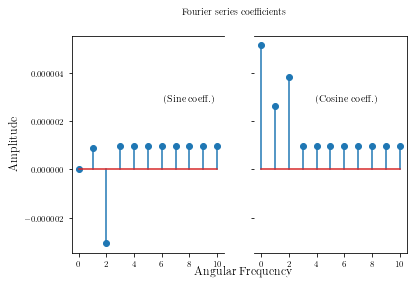

In [196]:
# Produce plots like in paper
#%%
t = np.arange(11)


fig, axs = plt.subplots(1, 2, sharey=True)
# Remove horizontal space between axes

fig.subplots_adjust(wspace=0.2)

# Plot each graph, and manually set the y tick values
axs[0].stem(t, Ss)
#axs[0].set_yscale('log')
axs[0].text(0.8,-0.1, 'Angular Frequency', fontsize=12, transform=axs[0].transAxes)
axs[0].text(0.6,0.7, '(Sine coeff.)', fontsize=10, transform=axs[0].transAxes)

axs[0].set_ylabel('Amplitude', fontsize=12)
axs[0].set_xticks(ticks=np.arange(0,11,2))
axs[0].set_xticks(ticks=np.arange(0,11,2))
axs[0].spines['right'].set_visible(False)

axs[1].stem(t, Cs)
axs[1].text(0.4,0.7, '(Cosine coeff.)', fontsize=10, transform=axs[1].transAxes)
#axs[1].set_yticks([])
axs[1].set_xticks(ticks=np.arange(0,11,2))
axs[1].spines['left'].set_visible(False)
plt.suptitle('Fourier series coefficients')

### Calculate Stokes Parameter using FFT on intensity

Do a FFT on the intensity to see if the sought-after frequencies are present

ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

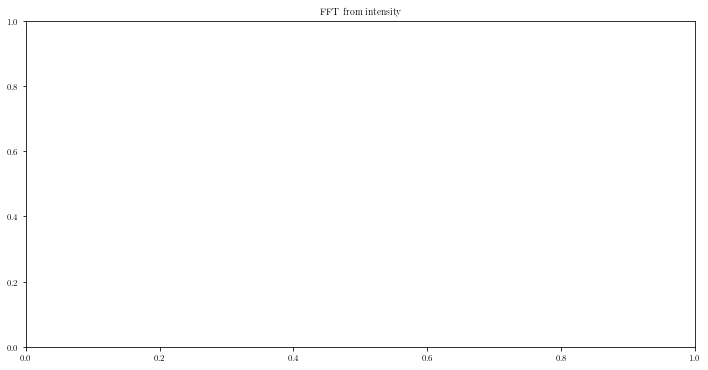

In [197]:
'''


# Number of sample points N from above
# Sample spacing i times omega

A=fftpack.rfft(intensity)




plt.figure(figsize = (12,6))
plt.title('FFT from intensity')
# Plot first 10 omegas
plt.plot(omega_k[0:10], np.abs(A)[0:10], 'o')
plt.xlabel(r'Angular Frequency [$\omega$]')
plt.ylabel('Amplitude')
plt.axvline(x=2  )
plt.axvline(x= 4  )

# Use the same formulas again

'''